In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [2]:
train_data = pd.read_csv('C:/Users/frane/kaggleproject/Data/preprocessed2-train-bank-data.csv', sep=';')
test_data = pd.read_csv('C:/Users/frane/kaggleproject/Data/preprocessed2-test-bank-data.csv', sep=';')

train_data.head()

,age,campaign,contacted.in.previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos,y
0,0.322632,1.000000,0.0,1.000000,0.612813,0.390735,0.970664,1.000000,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,-0.500000,-0.866025,-5.877853e-01,-0.809017,0.0
1,0.552137,0.000000,0.0,1.000000,0.422695,0.724448,0.970664,1.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.866025,-0.500000,-9.510565e-01,0.309017,0.0
2,0.636314,0.495659,0.0,0.854914,0.644951,0.710269,0.932652,0.710922,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.500000,-0.866025,-2.449294e-16,1.000000,0.0
3,0.798640,0.000000,0.0,0.432174,0.331438,0.428275,0.714556,0.743803,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-0.500000,0.866025,9.510565e-01,0.309017,0.0
4,0.552137,0.495659,0.0,1.000000,0.612813,0.390735,0.970309,1.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.500000,-0.866025,-9.510565e-01,0.309017,0.0


In [3]:
X_train, y_train = train_data.drop('y', axis=1), train_data['y']
X_test, y_test = test_data.drop('y', axis=1), test_data['y']

# Building Support Vector Classification Model

In [4]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

In [5]:
print(f"Metrics of model working on unseen data:\
      \n{classification_report(y_test, svc.predict(X_test))}")

print(f"Metrics of model working on seen data:\
      \n{classification_report(y_train, svc.predict(X_train))}")

Metrics of model working on unseen data:      
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      7105
         1.0       0.68      0.20      0.31       870

    accuracy                           0.90      7975
   macro avg       0.80      0.59      0.63      7975
weighted avg       0.88      0.90      0.88      7975

Metrics of model working on seen data:      
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     28211
         1.0       0.70      0.20      0.31      3617

    accuracy                           0.90     31828
   macro avg       0.80      0.59      0.63     31828
weighted avg       0.88      0.90      0.87     31828



In [6]:
svc=LinearSVC(class_weight='balanced', loss='hinge')
svc.fit(X_train, y_train)

c:\Users\frane\anaconda3\envs\kaggleproject\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(class_weight='balanced', loss='hinge')

In [7]:
print(f"Metrics of model working on unseen data:\
      \n{classification_report(y_test, svc.predict(X_test))}")

print(f"Metrics of model working on seen data:\
      \n{classification_report(y_train, svc.predict(X_train))}")

Metrics of model working on unseen data:      
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82      7105
         1.0       0.24      0.72      0.36       870

    accuracy                           0.72      7975
   macro avg       0.60      0.72      0.59      7975
weighted avg       0.88      0.72      0.77      7975

Metrics of model working on seen data:      
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     28211
         1.0       0.24      0.71      0.36      3617

    accuracy                           0.72     31828
   macro avg       0.60      0.71      0.59     31828
weighted avg       0.87      0.72      0.77     31828



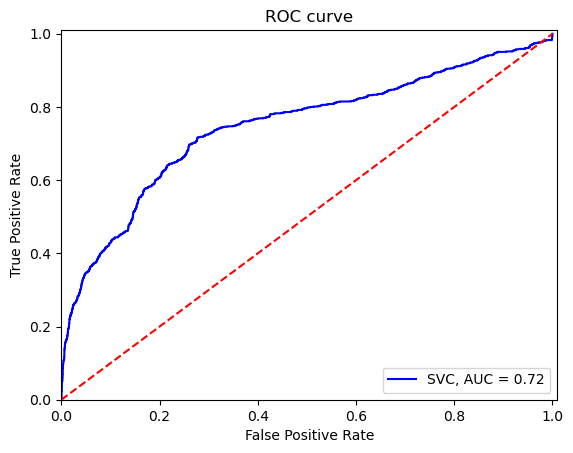

In [8]:
roc_auc = roc_auc_score(y_test, svc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svc._predict_proba_lr(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'SVC, AUC = {round(roc_auc, 2)}', color='b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Recall is slightly higher than in the second Logistic Regression Model, but the SVC is less accurate